# Plotting Data in Qiskit

In [1]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
%matplotlib inline

This notebook is intended for learning how to visualize results and quantum data with Qikit

### Histograms

A 2 - qubit bell state is given by :
![Bell state](https://wikimedia.org/api/rest_v1/media/math/render/svg/cc1f9f3d0ac01b1569b750b5b2db0428f433a169)
we can create, simulate and visualize a quantum circuit of this like so:

In [2]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

bell = QuantumCircuit(q,c)
bell.h(q[0]) # Hadamard gate (H-gate)
bell.cx(q[0],q[1]) # cNOT gate (Pauli x)

meas = QuantumCircuit(q,c)
meas.measure(q,c)


qasm_backend = BasicAer.get_backend('qasm_simulator') # simulator
qc = bell + meas

sim_job = execute(qc,qasm_backend,shots = 1_000)
print(sim_job.status())

JobStatus.RUNNING


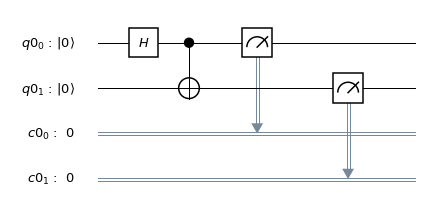

In [3]:
sim_result = sim_job.result() # get the results
qc.draw(output='mpl') # draw the circuit

{'11': 491, '00': 509}


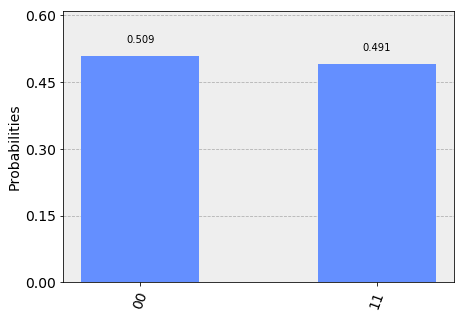

In [4]:
result_count = sim_result.get_counts(qc)
print(result_count) # number of occurances
plot_histogram(result_count) # percentage histogram

### Playing with histograms

In [5]:
# executing again!
sim_job = execute(qc, qasm_backend, shots = 1_000)
print(sim_job.status())

JobStatus.RUNNING


{'11': 491, '00': 509}


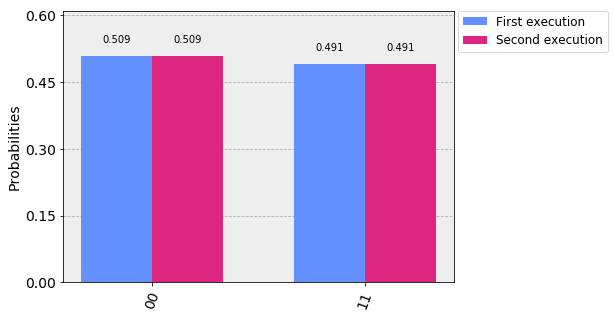

In [6]:
# collecting results again and plotting histogram with both combined
second_sim_result = sim_job.result()
second_sim_count = second_sim_result.get_counts(qc)
print(second_sim_count)
legend = ['First execution', 'Second execution']
plot_histogram([result_count, second_sim_count], legend = legend)

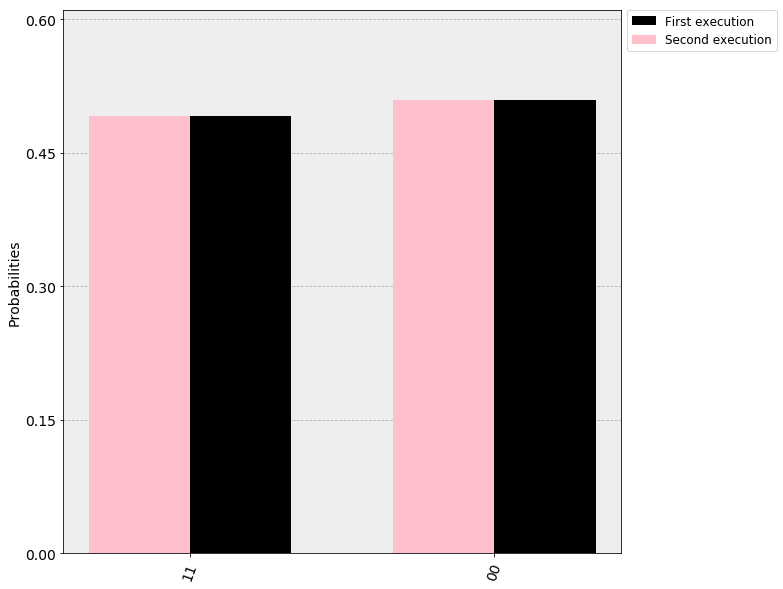

In [7]:
# we can also chnage the color and size of this plot
plot_histogram([result_count, second_sim_count], legend = legend, sort ='desc', figsize = (10,10), color = ['black', 'pink'], bar_labels = False)

In [8]:
# for interactive plotting!
from qiskit.visualization import iplot_histogram
iplot_histogram(result_count)

In [9]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [11]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(bell,backend)
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [12]:
result = job.result()
state_vector_psi = result.get_statevector(bell)

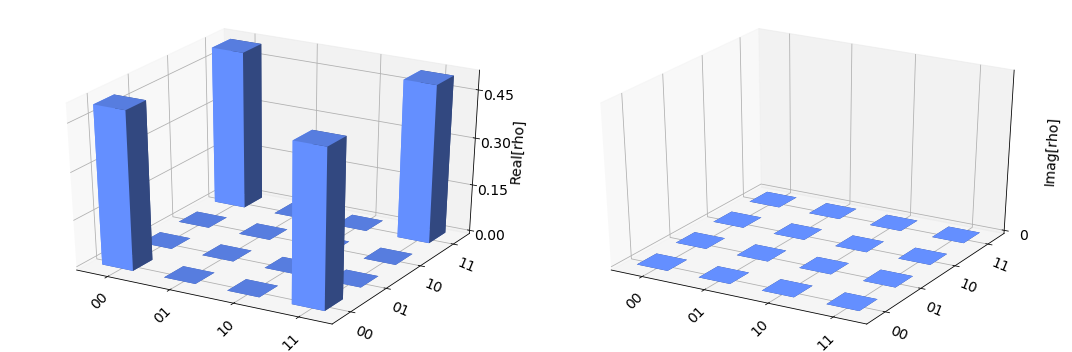

In [13]:
plot_state_city(state_vector_psi)

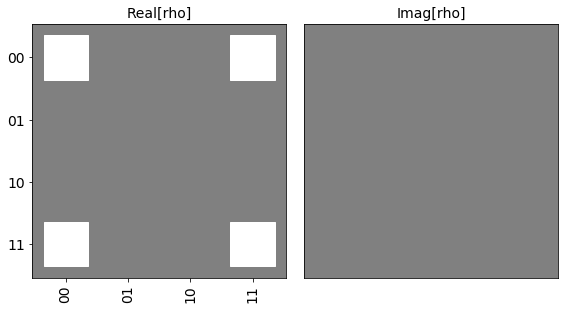

In [16]:
plot_state_hinton(state_vector_psi)

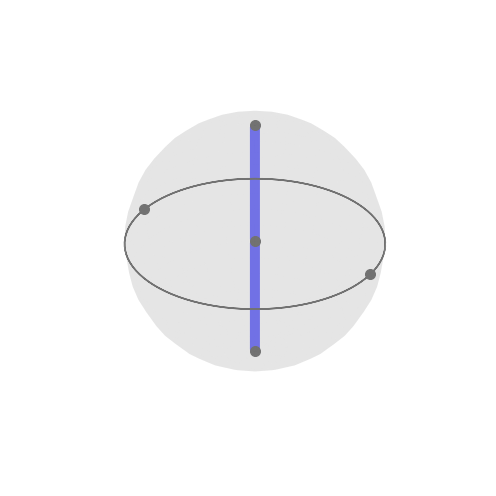

In [17]:
plot_state_qsphere(state_vector_psi)

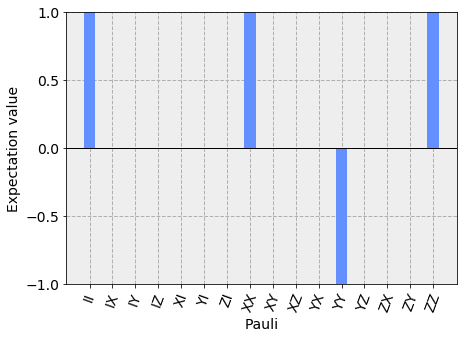

In [19]:
plot_state_paulivec(state_vector_psi)

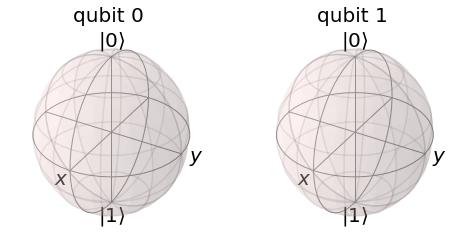

In [20]:
plot_bloch_multivector(state_vector_psi)

## Some plotting options that may be useful:
### plot_state_city()
- title(str): plot title
- figsize(tuple): figure size in inches (width, height)
- color (list): (list of length 2) first color = color of real component. second color = color of imaginary component.

### plot_state_hinton()
- title(str): plot title
- figsize(tuple): figure size in inches (width, height)

### plot_state_paulivec()
- title(str): plot title
- figsize(tuple): figure size in inches (width, height)
- color (list or str): color of the expectation value bars

### plot_state_qsphere()
- figsize(tuple): figure size in inches (width, height)

### plot_bloch_multivector()
- title(str)